In [24]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np

def rbf_kernel_pca(X, gamma, n_components):
    sq_dists = pdist(X, 'sqeuclidean')
    mat_sq_dists = squareform(sq_dists)
    K = exp(-gamma * mat_sq_dists)
    N = K.shape[0]
    one_n = np.ones((N,N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    
    eigvals, eivecs = eigh(K)
    
    X_pc = np.column_stack((eivecs[:,-i]) for  i in range(1, n_components + 1))
    return X_pc


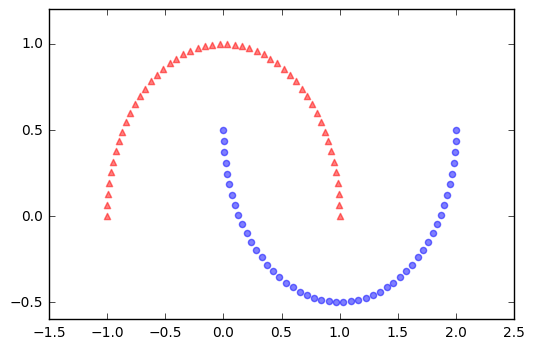

In [25]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X,y = make_moons(n_samples=100, random_state= 123)
plt.scatter(X[y==0, 0], X[y==0,1],color='red', marker='^', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1,1],color='blue', marker='o', alpha=0.5)
plt.show()

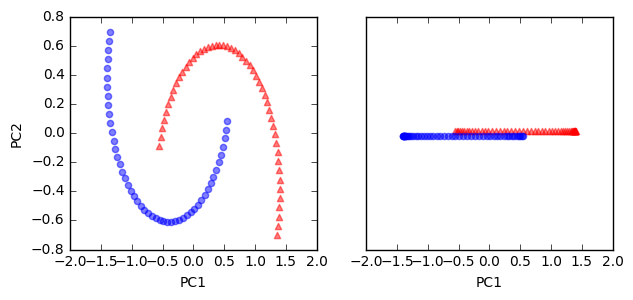

In [26]:
# 左：対象のデータをPCAで射影したもの。
# 右：PCAで分離した結果。x軸にPC１のみプロット。y軸は見やすいようにずらしただけ
from sklearn.decomposition import PCA
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)
fig ,ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))

ax[0].scatter(X_spca[y==0, 0], X_spca[y==0,1],color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y==1, 0], X_spca[y==1,1],color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_spca[y==0, 0], np.zeros((50,1)) + 0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y==1, 0], np.zeros((50,1)) - 0.02, color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show()


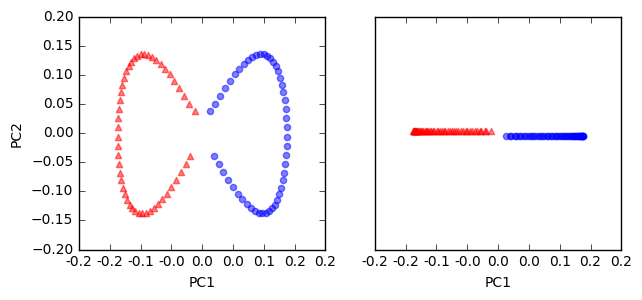

In [27]:
# 左：対象のデータをKPCAで射影したもの。
# 右：軸にPC1のみプロット。y軸は見やすいようにずらしただけ

from matplotlib.ticker import FormatStrFormatter
X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)

fig ,ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))

ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0,1],color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1,1],color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_kpca[y==0, 0], np.zeros((50,1)) + 0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((50,1)) - 0.02, color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

ax[0].xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
ax[1].xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
plt.show()

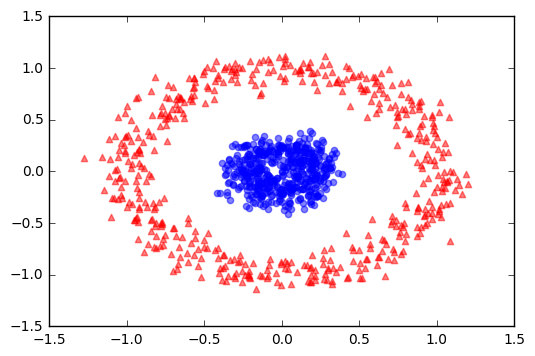

In [28]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)
plt.scatter(X[y==0, 0], X[y==0,1],color='red', marker='^', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1,1],color='blue', marker='o', alpha=0.5)
plt.show()

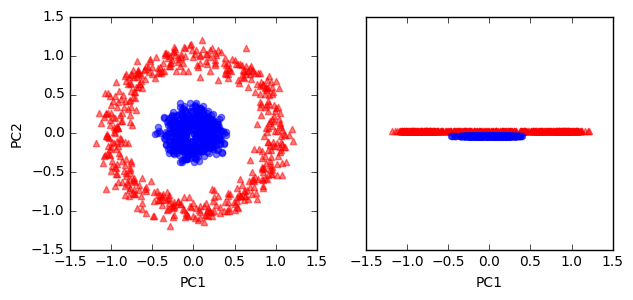

In [29]:
# 左：対象のデータをPCAで射影したもの。
# 右：PCAで分離した結果。x軸にPC１のみプロット。y軸は見やすいようにずらしただけ
from sklearn.decomposition import PCA
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)
fig ,ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))

ax[0].scatter(X_spca[y==0, 0], X_spca[y==0,1],color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y==1, 0], X_spca[y==1,1],color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_spca[y==0, 0], np.zeros((500,1)) + 0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y==1, 0], np.zeros((500,1)) - 0.02, color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show()


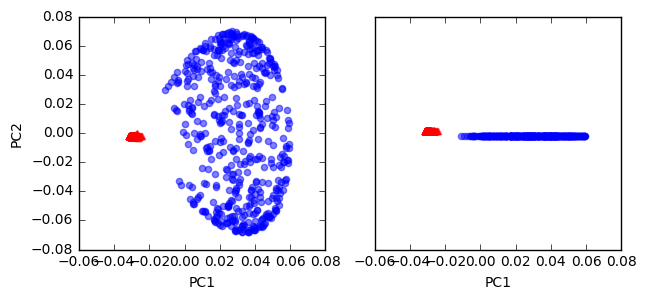

In [30]:
# 左：対象のデータをKPCAで射影したもの。
# 右：軸にPC1のみプロット。y軸は見やすいようにずらしただけ

from matplotlib.ticker import FormatStrFormatter
X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)

fig ,ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))

ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0,1],color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1,1],color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_kpca[y==0, 0], np.zeros((500,1)) + 0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((500,1)) - 0.02, color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

# ax[0].xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
# ax[1].xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
plt.show()

In [32]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np

def rbf_kernel_pca_2(X, gamma, n_components):
    sq_dists = pdist(X, 'sqeuclidean')
    mat_sq_dists = squareform(sq_dists)
    K = exp(-gamma * mat_sq_dists)
    N = K.shape[0]
    one_n = np.ones((N,N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    
    eigvals, eivecs = eigh(K)
    
    alphas = np.column_stack((eivecs[:,-i]) for  i in range(1, n_components + 1))
    lambdas = [eigvals[-i] for i in range(1, n_components+1)]
    return alphas, lambdas

In [40]:
#半月データ再取得
X, y = make_moons(n_samples=100, random_state=123)
# rbf_kernel_pca_2に投入。最初の主成分のαとλを取り出す。
alphas , lambdas = rbf_kernel_pca_2(X, gamma=15, n_components=1)

# 26番目のデータを新しいデータとする。
x_new = X[25]
print(x_new)
# 変更前の値
x_proj = alphas[25]
print(x_proj)

# 新規データx_newを投入した場合の、射影の再計算結果
def project_x(x_new, X, gamma, alphas, lambdas):
    pair_dist = np.array([np.sum((x_new-row)**2) for row in X])
    k = np.exp(-gamma * pair_dist)
    return k.dot(alphas / lambdas)

#再計算結果を取得
x_reproj = project_x(x_new, X, gamma=15, alphas=alphas, lambdas=lambdas)
print(x_reproj)

[ 1.8713187   0.00928245]
[ 0.07877284]
[ 0.07877284]


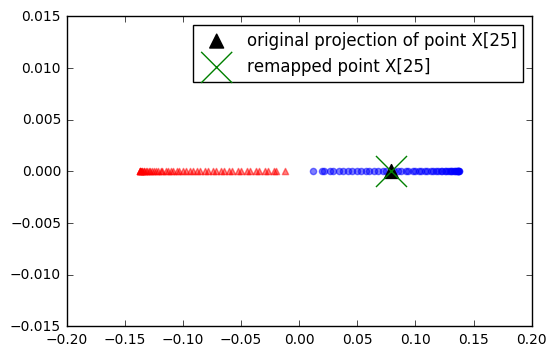

In [41]:
# 元のデータと、再計算した後のデータが一致することを確認

plt.scatter(alphas[y==0, 0], np.zeros((50)), color='red', marker='^', alpha=0.5)
plt.scatter(alphas[y==1, 0], np.zeros((50)),color='blue', marker='o', alpha=0.5)

plt.scatter(x_proj,0,color='black',label='original projection of point X[25]', marker='^', s=100)
plt.scatter(x_reproj,0,color='green',label='remapped point X[25]', marker='x', s=500)
plt.legend(scatterpoints=1)
plt.show()

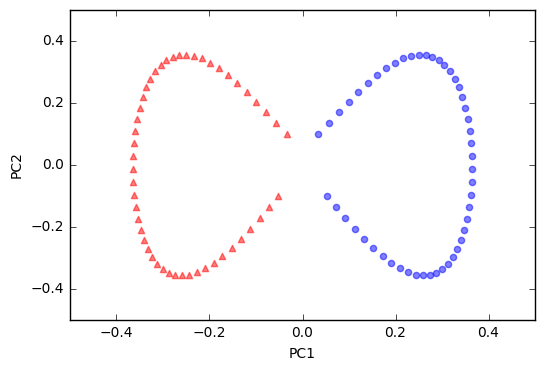

In [45]:
from sklearn.decomposition import KernelPCA
X,y = make_moons(n_samples=100, random_state=123)
scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_skernpca = scikit_kpca.fit_transform(X)

plt.scatter(X_skernpca[y==0, 0], X_skernpca[y==0,1],color='red', marker='^', alpha=0.5)
plt.scatter(X_skernpca[y==1, 0], X_skernpca[y==1,1],color='blue', marker='o', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()